# Homework 2


## References

+ Lectures 4-8 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [63]:
MAKE_BOOK_FIGURES=True
import numpy as np
import scipy.stats as st

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,

        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,

        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,

        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,

        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,

        # Remove legend frame
        'legend.frameon': False,

        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def set_notebook_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings - using default sizes
        'font.family': 'serif',
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,

        # Line and marker settings
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,

        # Layout settings
        'figure.constrained_layout.use': True,

        # Remove only top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,

        # Remove legend frame
        'legend.frameon': False,

        # Additional settings
        'figure.autolayout': True,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.

    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'

    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)

def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
else:
    set_notebook_style()

make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

## Student details

+ **First Name:**
+ **Last Name:**
+ **Email:**
+ **Used generative AI to complete this assignment (Yes/No):**
+ **Which generative AI tool did you use (if applicable)?:**

## Problem 1 - Joint probability mass function of two discrete random variables

Consider two random variables $X$ and $Y$.
$X$ takes values $\{0,1,\dots,4\}$ and $Y$ takes values $\{0,1,\dots,8\}$.
Their joint probability mass function, can be described using a matrix:

In [64]:
P = np.array(
    [
        [0.03607908, 0.03760034, 0.00503184, 0.0205082 , 0.01051408,
         0.03776221, 0.00131325, 0.03760817, 0.01770659],
        [0.03750162, 0.04317351, 0.03869997, 0.03069872, 0.02176718,
         0.04778769, 0.01021053, 0.00324185, 0.02475319],
        [0.03770951, 0.01053285, 0.01227089, 0.0339596 , 0.02296711,
         0.02187814, 0.01925662, 0.0196836 , 0.01996279],
        [0.02845139, 0.01209429, 0.02450163, 0.00874645, 0.03612603,
         0.02352593, 0.00300314, 0.00103487, 0.04071951],
        [0.00940187, 0.04633153, 0.01094094, 0.00172007, 0.00092633,
         0.02032679, 0.02536328, 0.03552956, 0.01107725]
    ]
)

The rows of the matrix correspond to the values of $X$ and the columns to the values of $Y$.
So, if you wanted to find the probability of $p(X=2, Y=3)$ you would do:

In [65]:
print(f"p(X=2, Y=3) = {P[2, 3]:.3f}")

p(X=2, Y=3) = 0.034


A. Verify that all the elements of $P$ sum to one, i.e., that $\sum_{x,y}p(X=x, Y=y) = 1$.

In [66]:
# Your code here
print(f"Sum of P_ij = {np.sum(P):.2f}")

Sum of P_ij = 1.00


B. Find the marginal probability density of $X$:

$$
p(x) = \sum_{y}p(x,y).
$$

You can represent this as a 5-dimensional vector.

In [67]:
# Hint, you can do this in one line if you read this:
help(np.sum)

Help on _ArrayFunctionDispatcher in module numpy:

sum(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)
    Sum of array elements over a given axis.
    
    Parameters
    ----------
    a : array_like
        Elements to sum.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a sum is performed.  The default,
        axis=None, will sum all of the elements of the input array.  If
        axis is negative it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If axis is a tuple of ints, a sum is performed on all of the axes
        specified in the tuple instead of a single axis or all the axes as
        before.
    dtype : dtype, optional
        The type of the returned array and of the accumulator in which the
        elements are summed.  The dtype of `a` is used by default unless `a`
        has an integer dtype of less precision than the default platform
        i

In [68]:
p_x = np.sum(P, axis=1)
print(f"pmf of just X: {p_x}")

pmf of just X: [0.20412376 0.25783426 0.19822111 0.17820324 0.16161762]


C. Find the marginal probability density of $Y$. This is a 9-dimensional vector.

In [69]:
# Your code here
p_y = np.sum(P, axis=0)
print(f"pmf of just Y: {p_y}")

pmf of just Y: [0.14914347 0.14973252 0.09144527 0.09563304 0.09230073 0.15128076
 0.05914682 0.09709805 0.11421933]


D. Find the expectation and variance of $X$ and $Y$.

In [70]:
# Your code here
E_X = np.sum(np.arange(5) * p_x)
print(f"E[X] = {E_X:.2f}")
E_Y = np.sum(np.arange(9) * p_y)
print(f"E[Y] = {E_Y:.2f}")

E[X] = 1.84
E[Y] = 3.69


E. Find the expectation of $E[X + Y]$.

In [71]:
# Your code here
E_X_Y = E_X + E_Y
print(f"E[X+Y] = {E_X_Y:.2f}")

E[X+Y] = 5.53


F. Find the covariance of $X$ and $Y$. Are the two variable correlated? If yes, are they positively or negatively correlated?

In [72]:
# Your code here
C_XY = 0.0 # Keeping track of the sum
for x in range(5):
    for y in range(9):
        C_XY += (x - E_X) * (y - E_Y) * P[x, y] # the += means add to the left hand side
print(f"C[X, Y] = {C_XY:.2f}")

C[X, Y] = 0.32


G. Find the variance of $X + Y$.

In [73]:
# Your code here
E_X2 = np.sum(np.arange(5) ** 2 * p_x)
V_X = E_X2 - E_X ** 2
E_Y2 = np.sum(np.arange(9) ** 2 * p_y)
V_Y = E_Y2 - E_Y ** 2
V_X_Y = V_X + V_Y + 2 * C_XY
print(f"V[X+Y] = {V_X_Y:.2f}")

V[X+Y] = 9.70


J. Find the probability that $X+Y$ is less than or equal to 5.
That is, find $p(X + Y \le 5)$.
Hint: Use two for loops to go over all the combinations of $X$ and $Y$ values, check if $X+Y\le 5$, and sum up the probabilities.

In [74]:
# Your code here
p_X_Y_le_5 = 0.0
for x in range(5):
    for y in range(9):
        if x + y <= 5:
            p_X_Y_le_5 += P[x, y]
print(f"p(X+Y <= 5) = {p_X_Y_le_5:.2f}")

p(X+Y <= 5) = 0.53


## Problem 2 - Zero correlation does not imply independence

The purpose of this problem is to show that zero correlation does not imply independence.
Consider the random variable $X$ and $Y$ following a standard normal distribution.
Define the random variable as $Z = X^2 + 0.01\cdot Y$.
You will show that the correlation between $X$ and $Z$ is zero even though they are not independent.

A. Take 100 samples of $X$ and $Z$ using numpy or scipy. Hint: First sample $X$ and $Y$ and use the samples to get $Z$.

In [75]:
# Your code here
X = np.random.randn(100)
Y = np.random.randn(100)
Z = X ** 2 + 0.01 * Y


B. Do the scatter plot between $X$ and $Z$.

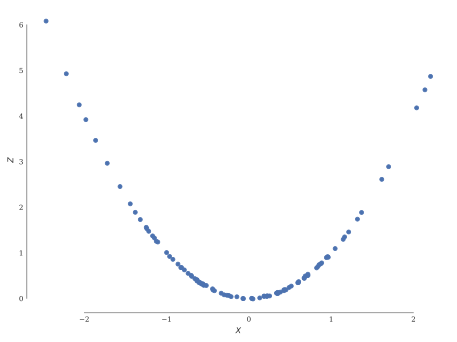

In [76]:
# Your code here
fig, ax = plt.subplots()
ax.scatter(X, Z)
ax.set_xlabel(r"$X$")
ax.set_ylabel(r"$Z$")
sns.despine(trim=True);

C. Use the scatter plot to argue that $X$ and $Z$ are not independent.

**Answer:**
<br><br>

D. Use the samples you took to estimate the variance of $Z$.

In [77]:
# Your code here
var_Z = np.var(Z)
print(f"var_Z = {var_Z:.2f}")

var_Z = 1.58


E. Use the samples you took to estimate the covariance between $X$ and $Z$.

In [78]:
# Your code here
cov_X_Z = np.cov(X,Z)
print(f"cov_X_Z = {cov_X_Z[0,1]:.5f}")

cov_X_Z = -0.19568


F. Use the results above to find the correlation between $X$ and $Z$.

In [79]:
# Your code here
corr_X_Z = cov_X_Z[0,1] / np.sqrt(np.var(X)*var_Z)
print(f"corr_X_Z = {corr_X_Z:.5f}")

corr_X_Z = -0.15923


G. The correlation coefficient you get may not be very close to zero. This is due to the fact that we estimate it with Monte Carlo averaging. To get a better estimate, we can increase the number of samples. Try increasing the number of samples to 1000 and see if the correlation coefficient gets closer to zero.

In [81]:
# Your code here
X_1k = np.random.randn(1000)
Y_1k = np.random.randn(1000)
Z_1k = X_1k ** 2 + 0.01 * Y_1k
cov_X1k_Z1k = np.cov(X_1k,Z_1k)
corr_X1k_Z1k = cov_X1k_Z1k[0,1]/np.sqrt(np.var(X_1k)*np.var(Z_1k))
print(f"corr_X1k_Z1k = {corr_X1k_Z1k:.5f}")

corr_X1k_Z1k = -0.04731


H. Let's do a more serious estimation of Monte Carlo convergence. Take 100,000 samples of $X$ and $Z$. Write code that estimates the correlation between $X$ and $Z$ using the first $n$ samples for $n=1,2,\ldots,100,000$. Plot the estimates as a function of $n$. What do you observe? How many samples do you need to get a good estimate of the correlation?


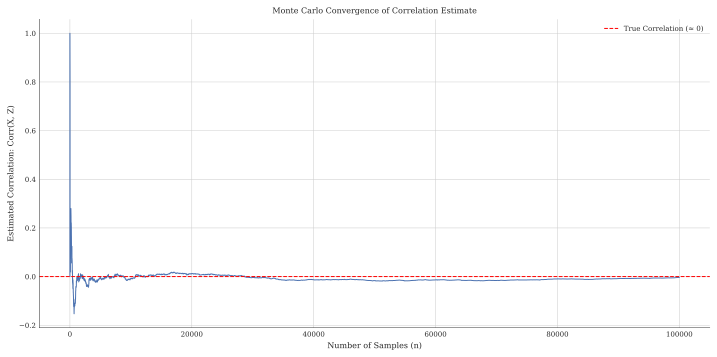

In [82]:
# Your code here
# Generate 100,000 samples
np.random.seed(0)
N = 100_000
X_100k = np.random.randn(N)
Y_100k = np.random.randn(N)
Z_100k = X_100k**2 + 0.01 * Y_100k

# Storage for correlation estimates
correlations = np.zeros(N)

# Compute running correlation
for n in range(1, N + 1):
    x_slice = X_100k[:n]
    z_slice = Z_100k[:n]

    # Use np.corrcoef for n >= 2, else default to 0 correlation
    if n == 1:
        correlations[n - 1] = 0.0  # correlation undefined for 1 sample
    else:
        correlations[n - 1] = np.corrcoef(x_slice, z_slice)[0, 1]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(1, N + 1), correlations, linewidth=1)
plt.axhline(0, color='red', linestyle='--', label='True Correlation (≈ 0)')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Estimated Correlation: Corr(X, Z)')
plt.title('Monte Carlo Convergence of Correlation Estimate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Problem 3 - Creating a stochastic model for the magnetic properties of steel

The magnetic properties of steel are captured in the so-called [$B-H$ curve](https://en.wikipedia.org/wiki/Saturation_(magnetic)), which connects the magnetic field $H$ to the magnetic flux density $B$.
The $B-H$ curve is a nonlinear function typically measured in the lab.
It appears in Maxwell's equations and is, therefore, crucial in the design of electrical machines.

The shape of the $B-H$ curve depends on the manufacturing process of the steel.
As a result, the $B-H$ differs across different suppliers but also across time for the same supplier.
The goal of this problem is to guide you through the process of creating a stochastic model for the $B-H$ curve using real data.
Such a model is the first step when we do uncertainty quantification for the design of electrical machines.
Once constructed, the stochastic model can generate random samples of the $B-H$ curve.
We can then propagate the uncertainty in the $B-H$ curve through Maxwell's equations to quantify the uncertainty in the performance of the electrical machine.

Let's use some actual manufacturer data to visualize the differences in the $B-H$ curve across different suppliers.
The data are [here](https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/homework/B_data.csv).
Explaining how to upload data on Google Colab will take a while.
We will do it in the next homework set.
You should know that the data file ``B_data.csv`` needs to be in the same working directory as this Jupyter Notebook.
I have written some code that allows you to put the data file in the right place without too much trouble.
Run the following:

In [ ]:
url = "https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/lecturebook/data/B_data.csv"
!curl -O $url

If everything worked well, then the following will work:

In [ ]:
B_data = np.loadtxt('B_data.csv')
B_data

The shape of this dataset is:

In [ ]:
B_data.shape

The rows (200) correspond to different samples of the $B-H$ curves (suppliers and times).
The columns (1500) correspond to different values of $H$.
That is, the $i, j$ element is the value of $B$ at the specific value of $H$, say $H_j$. The values of $H$ are equidistant and identical; we will ignore them in this analysis.
Let's visualize some of the samples.

Here is one sample:

In [ ]:
fig, ax = plt.subplots()
ax.plot(B_data[0, :])
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)")
sns.despine(trim=True);

Here are five samples:

In [ ]:
fig, ax = plt.subplots()
ax.plot(B_data[:5, :].T)
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)")
sns.despine(trim=True);

Here are all the samples:

In [ ]:
fig, ax = plt.subplots()
ax.plot(B_data[:, :].T, 'r', lw=0.1)
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)")
sns.despine(trim=True);

A. We are going to start by studying the data at only one index. Say index $j=500$.
Let's define a random variable

$$
X = B(H_{500}),
$$

for this reason. Extract and do a histogram of the data for $X$:

In [ ]:
X_data = B_data[:, 500]
fig, ax = plt.subplots()
ax.hist(X_data, alpha=0.5, density=True)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"p(x)")
sns.despine(trim=True);

This looks like a Gaussian $N(\mu_{500}, \sigma_{500}^2)$. Let's try to find a mean and variance for that Gaussian.
A good choice for the mean is the empirical average of the data:

$$
\mu_j = \frac{1}{N}\sum_{i=1}^NB_{ij}.
$$

By the law of large numbers, this is a good approximation of the true mean as $N\to\infty$.
Later we will learn that this is also the *maximum likelihood* estimate of the mean.

So, the mean is:

In [ ]:
mu_500 = X_data.mean()
print(f"mu_500 = {mu_500:.2f}")

Similarly, for the variance a good choice is the empirical variance defined by:

$$
\sigma_j^2 = \frac{1}{N}\sum_{i=1}^N(B_{ij} - \mu_j)^2.
$$

This also converges to the true variance as $N\to\infty$.
Here it is:

In [ ]:
sigma2_500 = np.var(X_data)
print(f"sigma_500 = {sigma2_500:.2e}")

Repeat the plot of the histogram of $X$ along with the PDF of the normal variable we have just identified using the functionality of ``scipy.stats``.

In [ ]:
# Your code here

B. Using your normal approximation to the PDF of $X$, find the probability that $X = B(H_{500})$ is greater than 1.66 T.

In [ ]:
# Your code here

C. Let us now consider another random variable

$$
Y = B(H_{1000}).
$$

Isolate the data for this as well:

In [ ]:
Y_data = B_data[:, 1000]

Do the ``scatter`` plot of $X$ and $Y$:

In [ ]:
# Your code here

D. From the scatter plot, it looks like the random vector

$$
\mathbf{X} = (X, Y),
$$

follows a multivariate normal distribution. What would be the mean and covariance of the distribution?
First, organize the samples of $X$ and $Y$ in a matrix with the number of rows being the number of samples and two columns (one corresponding to $X$ and one to $Y$).

In [ ]:
XY_data = np.hstack([X_data[:, None], Y_data[:, None]])

In case you are wondering, the code above takes two 1D numpy arrays of the same size and puts them in a two-column numpy array. The first column is the first array, the second column is the second array. The result is a 2D numpy array.
We take sampling averages over the first axis of the array.

The mean vector is:

In [ ]:
mu_XY = np.mean(XY_data, axis=0)
print(f"mu_XY = {mu_XY}")

The covariance matrix is trickier.
We have already discussed how to find the diagonals of the covariance matrix (it is simply the variance).
For the off-diagonal terms, this is the formula that is being used:

$$
C_{jk} = \frac{1}{N}\sum_{i=1}^N(B_{ij} - \mu_j)(B_{ik} - \mu_k).
$$

This formula converges as $N\rightarrow\infty$.
Here is the implementation:

In [ ]:
# Careful with np.cov because it requires you to transpose the matrix we defined in class
C_XY = np.cov(XY_data.T)
print(f"C_XY =")
print(C_XY)

Use the covariance matrix `C_XY` to find the correlation coefficient between $X$ and $Y$.

In [ ]:
# Your code here

Are the two variables $X$ and $Y$ positively or negatively correlated?<br>
<br>
**Answer:**
<br><br>

E. Use ``np.linalg.eigh`` to check that the matrix ``C_XY`` is indeed positive definite.

In [ ]:
# Your code here

F. Use the functionality of ``scipy.stats.multivariate_normal`` to plot the joint probability function of the samples of $X$ and $Y$ in the same plot as the scatter plot of $X$ and $Y$.

In [ ]:
# Your code here

G. Now, consider each $B-H$ curve a random vector.
That is, the random vector $\mathbf{B}$ corresponds to the magnetic flux density values at a fixed number of $H$-values. It is:

$$
\mathbf{B} = (B(H_1), \dots, B(H_{1500})).
$$

It is like $\mathbf{X} = (X, Y)$ only now we have 1,500 dimensions instead of $2$.

First, let's find the mean of this random vector:

In [ ]:
B_mu = np.mean(B_data, axis=0)
B_mu

Let's plot the mean on top of all the data we have:

In [ ]:
fig, ax = plt.subplots()
ax.plot(B_data[:, :].T, 'r', lw=0.1)
plt.plot([],[], 'r', label='Data')
ax.plot(B_mu, label="Mean vector")
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

It looks good. Now, find the covariance matrix of $\mathbf{B}$. This is going to be a 1500x1500 matrix.

In [ ]:
B_cov = np.cov(B_data.T)
B_cov

Let's plot this matrix:

In [ ]:
fig, ax = plt.subplots()
c = ax.imshow(B_cov, interpolation='nearest')
plt.colorbar(c, label="Covariance")
sns.despine(trim=True);

The numbers are very small.
This is because the covariance depends on the units of the variables.
We need to do the same thing we did with the correlation coefficient: divide by the standard deviations of the variables.
Here is how you can get the correlation coefficients:

In [ ]:
# Note that I have to remove the first point because it is always zero
# and it has zero variance.
B_corr = np.corrcoef(B_data[:,1:].T)
B_corr

Here is the correlation visualized:

In [ ]:
fig, ax = plt.subplots()
c = ax.imshow(B_corr, interpolation='nearest')
plt.colorbar(c, label="Correlation")
sns.despine(trim=True);

The values are quite a bit correlated. This makes sense because the curves are all very smooth and look very much alike.

Let's check if the covariance is indeed positive definite:

In [ ]:
print("Eigenvalues of B_cov:")
print(np.linalg.eigh(B_cov)[0])

Notice that several eigenvalues are negative, but they are too small. Very close to zero. This happens often in practice when you are finding the covariance of large random vectors. It arises from the fact that we use floating-point arithmetic instead of real numbers. It is a numerical artifact.
If you tried to use this covariance to make a multivariate average random vector using ``scipy.stats`` it would fail.
Try this:

In [ ]:
B = st.multivariate_normal(mean=B_mu, cov=B_cov)

The way to overcome this problem is to add a small positive number to the diagonal. This needs to be very small so that the distribution stays mostly the same. It must be the smallest possible number that makes the covariance matrix behave well. This is known as the *jitter* or the *nugget*. Find the nugget playing with the code below. Every time you try, multiply the nugget by ten.

In [ ]:
# Pick the nugget here
nugget = 1e-12
# This is the modified covariance matrix
B_cov_w_nugget = B_cov + nugget * np.eye(B_cov.shape[0])
# Try building the distribution:
try:
    B = st.multivariate_normal(mean=B_mu, cov=B_cov_w_nugget)
    print('It worked! Move on.')
except:
    print('It did not work. Increase nugget by 10.')

H. Now, you have created your first stochastic model of a complicated physical quantity. By sampling from your newly constructed random vector $\mathbf{B}$, you have essentially quantified your uncertainty about the $B-H$ curve as induced by the inability to control steel production perfectly. Take ten samples of this random vector and plot them.

In [ ]:
# Your code here

Congratulations!
You have made your first stochastic model of a physical field quantity.
You can now sample $B-H$ curves in a way that honors the manufacturing uncertainties.
This is the first step in uncertainty quantification studies.
The next step would be to propagate these samples through Maxwell's equations to characterize the effect on the performance of an electric machine.
If you want to see how that looks, look at {cite}`sahu2020` and {cite}`beltran2020`.